# Combined Data Exploration

In this data set, we will explore how our three key datasets (socioeconomic, health, and election) interact with each other. The first step is to combine our cleaned data sets together. 

In [1]:
import pandas as pd
import geopandas as gpd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
health_df = pd.read_csv(r'../data/health_clean.csv')
voting_df = pd.read_csv(r'../data/election_clean.csv')
socioecon_df = pd.read_csv(r'../data/socioeconomic_data_clean.csv')

In [3]:
health_df.head()

,state_fips,county_fips,fips5,state_abbreviation,name,poor_fair_health,poor_physical_days,poor_mental_days,life_exp,ratio_population_to_physicians,physicians_to_population,income_inequality
0,0,0,0,US,United States,0.171987,3.752828,3.970321,79.089130,1325.090530,0.000755,4.920018
1,1,0,1000,AL,Alabama,0.220287,4.918052,4.939753,75.416194,1542.641456,0.000648,5.261136
2,1,1,1001,AL,Autauga County,0.208830,4.743889,4.654031,76.879477,2220.160000,0.000450,5.234597
3,1,3,1003,AL,Baldwin County,0.175091,4.224519,4.304056,78.450258,1371.793548,0.000729,4.417767
4,1,5,1005,AL,Barbour County,0.295918,5.430279,5.185594,75.341935,3158.750000,0.000317,5.681410


In [4]:
health_df.shape

(3194, 12)

In [5]:
voting_df.head()

,state_name,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,county_fips,outcome,state_proportion
0,Alabama,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184,1001,Rep,NaN
1,Alabama,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623,1003,Rep,NaN
2,Alabama,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631,1005,Rep,NaN
3,Alabama,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280,1007,Rep,NaN
4,Alabama,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022,1009,Rep,NaN


In [6]:
socioecon_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,County Name,% Severe Housing Problems,% Uninsured,High school graduation rate,% Unemployed,Income Inequality,Median household income,% Rural,Residential Segregation,Median household income (White),Median household income (Black),Population
0,0,0,0,US,United States,0.179136,0.102234,0.846000,0.038953,4.920018,61937.0,0.192690,46.773464,NaN,NaN,327167434.0
1,1,0,1000,AL,Alabama,0.143407,0.110448,0.893000,0.039336,5.261136,49881.0,0.409632,50.777776,NaN,NaN,4887871.0
2,1,1,1001,AL,Autauga County,0.146635,0.087217,0.900000,0.036291,5.234597,59338.0,0.420022,23.628395,65047.0,27643.0,55601.0
3,1,3,1003,AL,Baldwin County,0.135662,0.113334,0.863616,0.036154,4.417767,57588.0,0.422791,31.825343,59418.0,31112.0,218022.0
4,1,5,1005,AL,Barbour County,0.145833,0.122428,0.814103,0.051714,5.681410,34382.0,0.677896,23.449713,47031.0,23013.0,24881.0


In [7]:
combined_df = pd.concat([socioecon_df, voting_df, health_df], axis=1)

In [8]:
combined_df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,County Name,% Severe Housing Problems,% Uninsured,High school graduation rate,% Unemployed,Income Inequality,...,fips5,state_abbreviation,name,poor_fair_health,poor_physical_days,poor_mental_days,life_exp,ratio_population_to_physicians,physicians_to_population,income_inequality
0,0,0,0,US,United States,0.179136,0.102234,0.846000,0.038953,4.920018,...,0,US,United States,0.171987,3.752828,3.970321,79.089130,1325.090530,0.000755,4.920018
1,1,0,1000,AL,Alabama,0.143407,0.110448,0.893000,0.039336,5.261136,...,1000,AL,Alabama,0.220287,4.918052,4.939753,75.416194,1542.641456,0.000648,5.261136
2,1,1,1001,AL,Autauga County,0.146635,0.087217,0.900000,0.036291,5.234597,...,1001,AL,Autauga County,0.208830,4.743889,4.654031,76.879477,2220.160000,0.000450,5.234597
3,1,3,1003,AL,Baldwin County,0.135662,0.113334,0.863616,0.036154,4.417767,...,1003,AL,Baldwin County,0.175091,4.224519,4.304056,78.450258,1371.793548,0.000729,4.417767
4,1,5,1005,AL,Barbour County,0.145833,0.122428,0.814103,0.051714,5.681410,...,1005,AL,Barbour County,0.295918,5.430279,5.185594,75.341935,3158.750000,0.000317,5.681410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,56037,WY,Sweetwater County,0.098579,0.144650,0.805000,0.042364,3.975923,...,56037,WY,Sweetwater County,0.148131,3.402029,3.623554,77.285778,2720.875000,0.000368,3.975923
3190,56,39,56039,WY,Teton County,0.169679,0.160345,0.877660,0.030248,3.775274,...,56039,WY,Teton County,0.119144,3.031233,3.180613,89.489445,861.666667,0.001161,3.775274
3191,56,41,56041,WY,Uinta County,0.114401,0.136647,0.846875,0.043668,4.350061,...,56041,WY,Uinta County,0.155375,3.628488,3.669805,79.245997,2277.222222,0.000439,4.350061
3192,56,43,56043,WY,Washakie County,0.100143,0.167303,0.845361,0.042385,3.327463,...,56043,WY,Washakie County,0.159560,3.613308,3.682514,79.451504,2016.000000,0.000496,3.327463


Now that the data sets are combined, we are also interested in looking at counties that voted overwhelmingly for one party, this will be the partisan_df

In [9]:
part_filter = combined_df['per_point_diff'] > 0.5 
partisan_df = combined_df[part_filter]

In [10]:
combined_df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State,County Name,% Severe Housing Problems,% Uninsured,High school graduation rate,% Unemployed,Income Inequality,...,fips5,state_abbreviation,name,poor_fair_health,poor_physical_days,poor_mental_days,life_exp,ratio_population_to_physicians,physicians_to_population,income_inequality
0,0,0,0,US,United States,0.179136,0.102234,0.846000,0.038953,4.920018,...,0,US,United States,0.171987,3.752828,3.970321,79.089130,1325.090530,0.000755,4.920018
1,1,0,1000,AL,Alabama,0.143407,0.110448,0.893000,0.039336,5.261136,...,1000,AL,Alabama,0.220287,4.918052,4.939753,75.416194,1542.641456,0.000648,5.261136
2,1,1,1001,AL,Autauga County,0.146635,0.087217,0.900000,0.036291,5.234597,...,1001,AL,Autauga County,0.208830,4.743889,4.654031,76.879477,2220.160000,0.000450,5.234597
3,1,3,1003,AL,Baldwin County,0.135662,0.113334,0.863616,0.036154,4.417767,...,1003,AL,Baldwin County,0.175091,4.224519,4.304056,78.450258,1371.793548,0.000729,4.417767
4,1,5,1005,AL,Barbour County,0.145833,0.122428,0.814103,0.051714,5.681410,...,1005,AL,Barbour County,0.295918,5.430279,5.185594,75.341935,3158.750000,0.000317,5.681410


In [11]:
list(combined_df)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State',
 'County Name',
 '% Severe Housing Problems',
 '% Uninsured',
 'High school graduation rate',
 '% Unemployed',
 'Income Inequality',
 'Median household income',
 '% Rural',
 'Residential Segregation',
 'Median household income (White)',
 'Median household income (Black)',
 'Population',
 'state_name',
 'county_name',
 'votes_gop',
 'votes_dem',
 'total_votes',
 'diff',
 'per_gop',
 'per_dem',
 'per_point_diff',
 'county_fips',
 'outcome',
 'state_proportion',
 'state_fips',
 'county_fips',
 'fips5',
 'state_abbreviation',
 'name',
 'poor_fair_health',
 'poor_physical_days',
 'poor_mental_days',
 'life_exp',
 'ratio_population_to_physicians',
 'physicians_to_population',
 'income_inequality']

In [12]:
combined_df.to_csv(r'../data/combined_df.csv', index = False)

Comparing Insurance rates to health data colored by party 

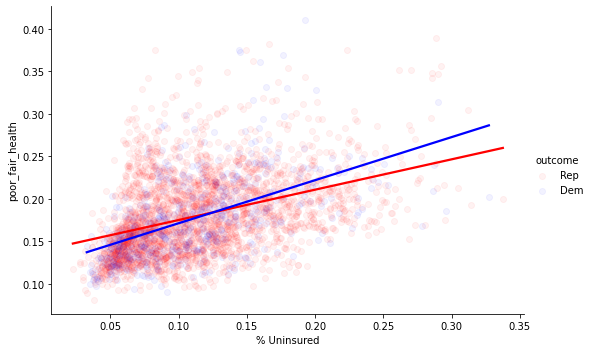

In [13]:
Health_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'poor_fair_health',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)
plt.title="exploring the comparison between health and health insurance across Democratic and Republican voters"

As insurance rates decrease overall health also decreases. In soly democrat (blue) counties, this correlation is stronger. 

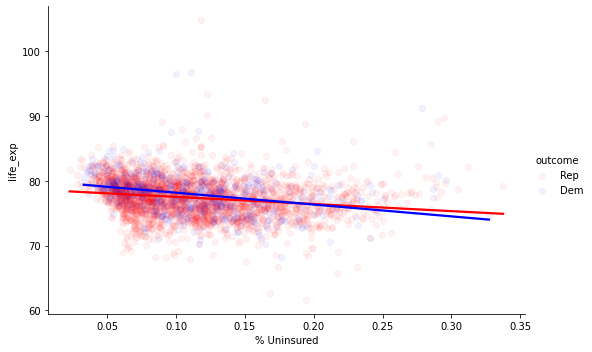

In [14]:
Life_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'life_exp',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)


As insurance rates decrease life expectancy decreases. In soly democrat (blue) counties, this correlation is stronger. 

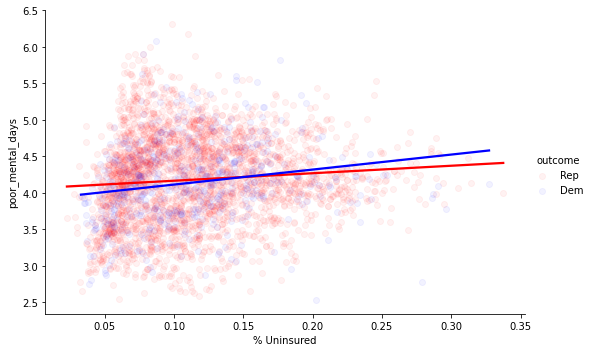

In [15]:
Mental_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'poor_mental_days',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)

As insurance rates decrease mental health also decreases. In soly democrat (blue) counties, this correlation is stronger. 

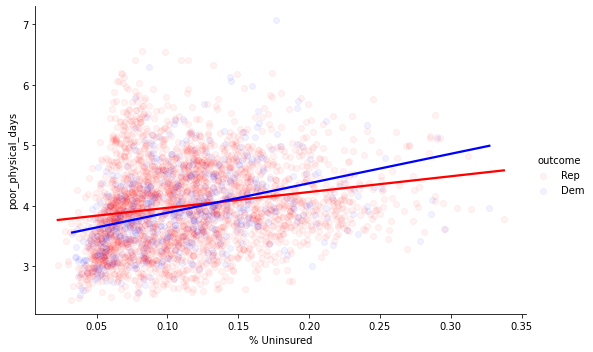

In [16]:
Physical_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'poor_physical_days',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=5, 
                                   aspect=1.5, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.05},
                                  ci=0)

As insurance rates decrease physical health also decreases. In soly democrat (blue) counties, this correlation is stronger. 

The four graphs above show that ACROSS ALL EXAMINED HEALTH INDICATORS Democratic counties are more sensitive to changes in level of insurance than Republican counties are. 

In [17]:
dem_filter = combined_df['outcome'] == "Dem"
dem_df = combined_df[dem_filter]
dem_df[['% Uninsured', 'poor_physical_days', 'poor_fair_health', 'poor_mental_days']].corr()

,% Uninsured,poor_physical_days,poor_fair_health,poor_mental_days
% Uninsured,1.000000,0.370127,0.525916,0.187978
poor_physical_days,0.370127,1.000000,0.890392,0.906348
poor_fair_health,0.525916,0.890392,1.000000,0.740367
poor_mental_days,0.187978,0.906348,0.740367,1.000000


In [18]:
rep_filter = combined_df['outcome'] == "Rep"
rep_df = combined_df[rep_filter]
rep_df[['% Uninsured', 'poor_physical_days', 'poor_fair_health', 'poor_mental_days']].corr()

,% Uninsured,poor_physical_days,poor_fair_health,poor_mental_days
% Uninsured,1.000000,0.188483,0.392875,0.086512
poor_physical_days,0.188483,1.000000,0.891007,0.937889
poor_fair_health,0.392875,0.891007,1.000000,0.787137
poor_mental_days,0.086512,0.937889,0.787137,1.000000


As seen above the correlation between health varibales and insurance is stronger for democrat counties than republicans 

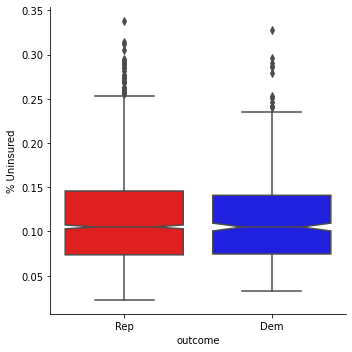

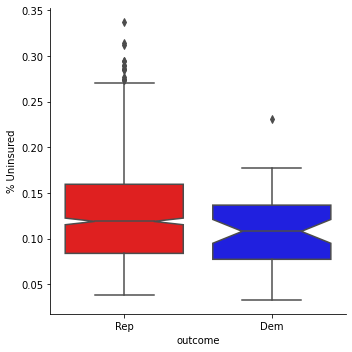

In [19]:
sns.catplot(x='outcome', y='% Uninsured', 
            data=combined_df, kind='box', notch=True,
            palette=['r','b'])

sns.catplot(x='outcome', y='% Uninsured', 
            data=partisan_df, kind='box', notch=True,
            palette=['r','b'])

In the first plot overall it seems like democratic counties and republican countires have similar unisurance rates, but looking only at counties that staunchly voted for one party, the difference is stronger. Staunchly republican counties have higher rates of unisurance. 

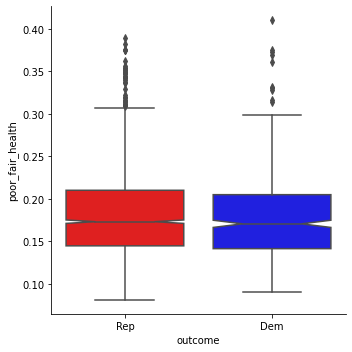

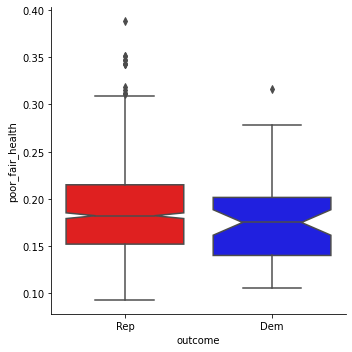

In [20]:
sns.catplot(x='outcome', y='poor_fair_health', 
            data=combined_df, kind='box', notch=True,
            palette=['r','b'])

sns.catplot(x='outcome', y='poor_fair_health', 
            data=partisan_df, kind='box', notch=True,
            palette=['r','b'])

In the first plot overall it seems like democratic counties and republican countires have similar overall health, but looking only at counties that staunchly voted for one party, the difference is stronger. Staunchly republican counties have worse health. 

Percentage Rural by Party:
outcome
Dem    0.513306
Rep    0.595442
Name: Percent_Rural, dtype: float64 

Average Median Income by Party:
outcome
Dem    55864.587074
Rep    52190.050116
Name: Median_Household_Income, dtype: float64 

Standard Deviation of Median Income by Party:
outcome
Dem    16677.799742
Rep    13114.765696
Name: Median_Household_Income, dtype: float64 



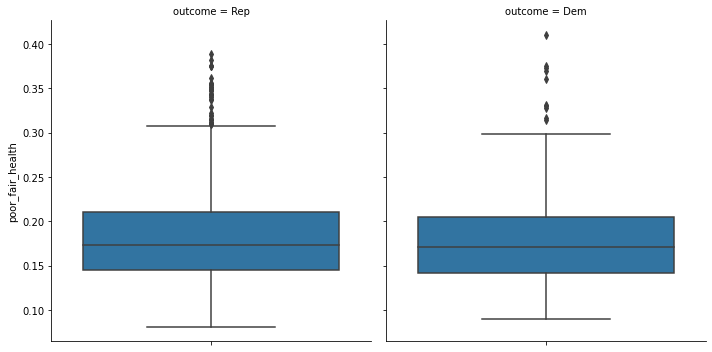

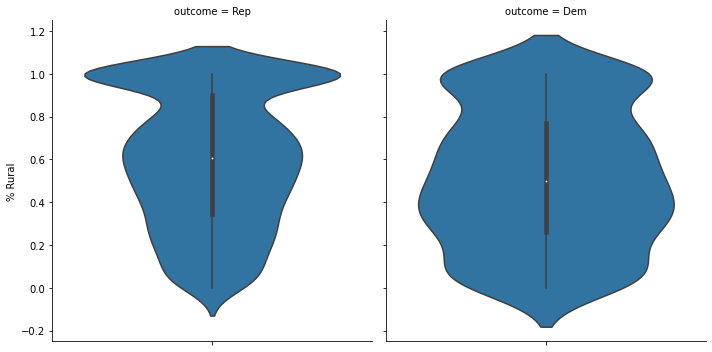

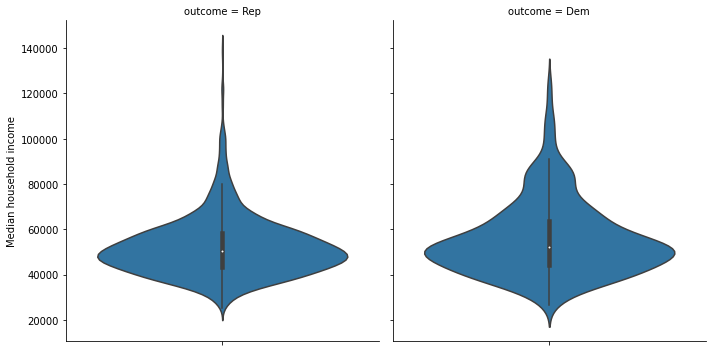

In [21]:

Health_partisan = sns.catplot(y='poor_fair_health', data=combined_df, kind='box', col='outcome')
print(Health_partisan)

Rural_partisan = sns.catplot(y='% Rural', data=combined_df, kind='violin', col='outcome')
print(Rural_partisan)

Income_partisan = sns.catplot(y='Median household income', data=combined_df, kind='violin', col='outcome')
print(Income_partisan)

combined_df['Percent_Rural'] = combined_df['% Rural']
Rural_byparty = combined_df.groupby("outcome").Percent_Rural.mean()
print('Percentage Rural by Party:')
print(Rural_byparty, '\n')

combined_df['Median_Household_Income'] = combined_df['Median household income']
Income_byparty = combined_df.groupby("outcome").Median_Household_Income.mean()
print('Average Median Income by Party:')
print(Income_byparty, '\n')
Income2_byparty = combined_df.groupby("outcome").Median_Household_Income.std()
print('Standard Deviation of Median Income by Party:')
print(Income2_byparty, '\n')

From the six plots above, overall democrat and republican counties have similar levels of overall health, republican counties have more rural counties, and republican and democrat counties have similar distributions for median household income. 

Below is a colored version of the median income plot, as an example on how to color these plots if we decide to use them. 

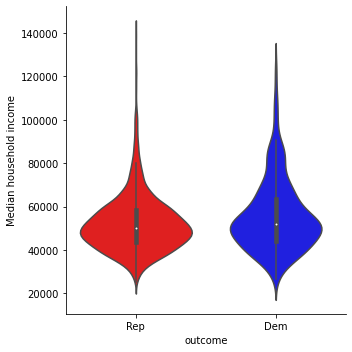

In [22]:
sns.catplot(x='outcome', y='Median household income', 
            data=combined_df, kind='violin', notch=True,
            palette=['r','b'])

# Physician Data

Access to health providers --- using ratio of population to physicians so numeric value is interpreted as for every x people there is one physician

Variables: 

* physicians_to_population -- the raw value from the dataset -- essentially the numeric value represents the number of pyhsicians per person so it is a very low decimal value
* ratio_population_to_physicians -- the numeric value represents the number of people per physician
* These variables are inverses of each other ratio_population_to_physicians = physicians_to_population^-1


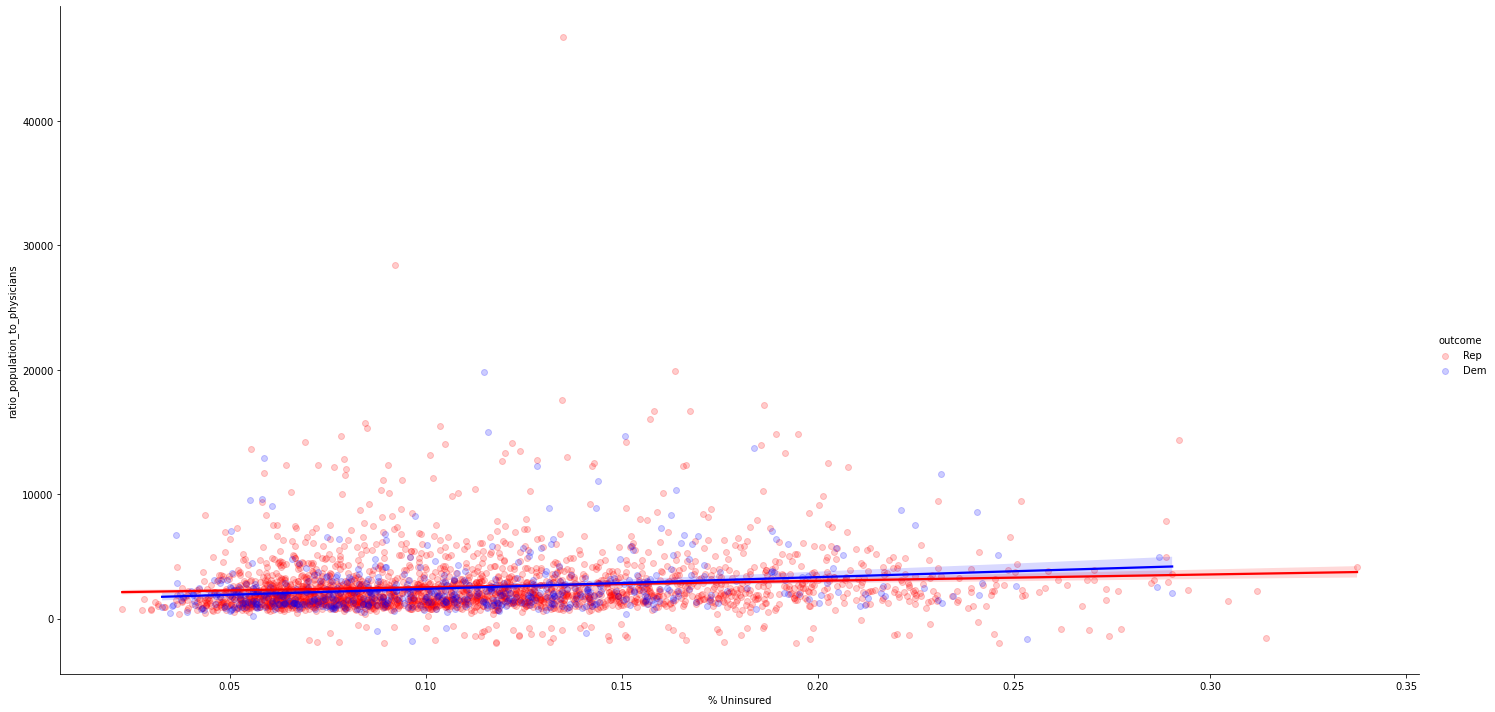

In [23]:
Physician_Insurance_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'ratio_population_to_physicians',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=10, 
                                   aspect=2, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.2})

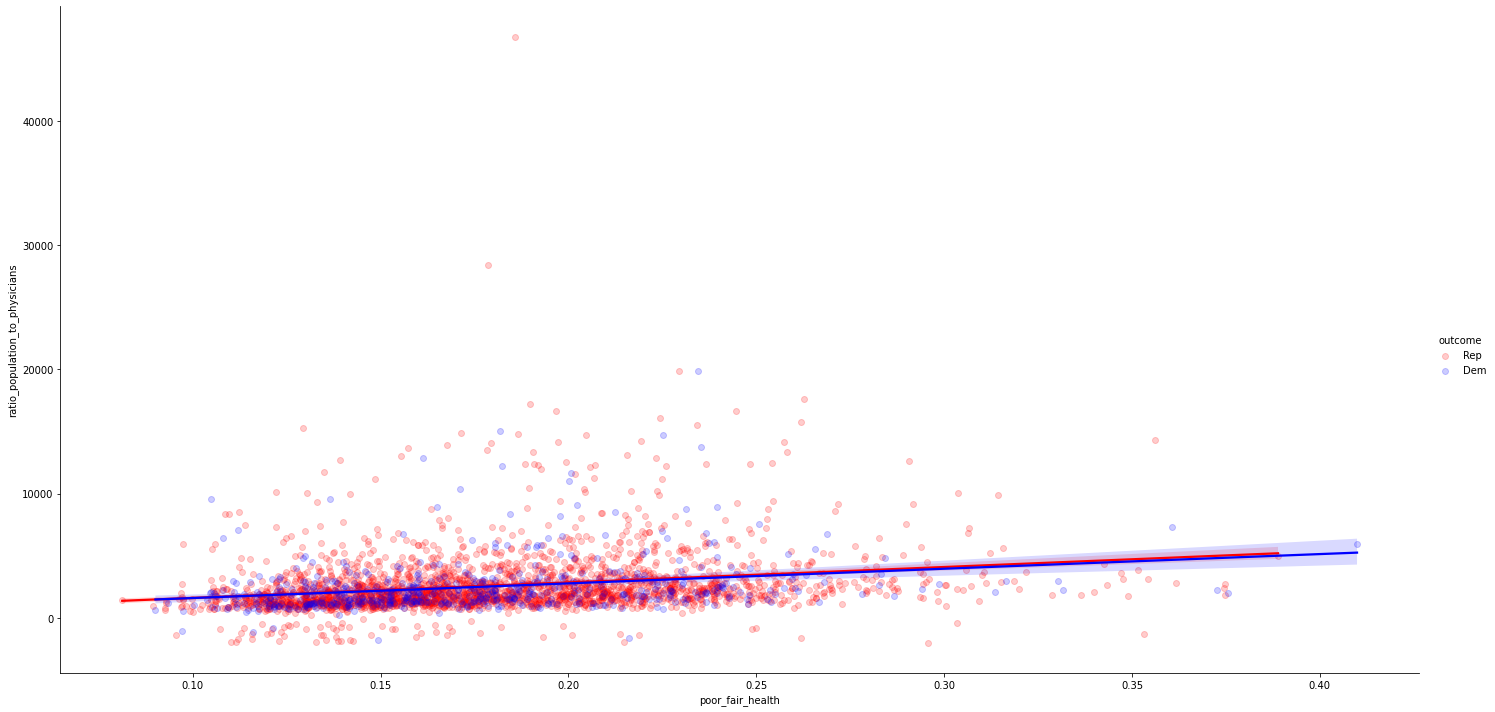

In [24]:
Health_Physician_Plot = sns.lmplot(x = 'poor_fair_health',
                                   y = 'ratio_population_to_physicians',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=10, 
                                   aspect=2, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.2})

In [25]:
combined_df[['poor_fair_health', 'ratio_population_to_physicians', '% Uninsured', 'physicians_to_population']].corr()

,poor_fair_health,ratio_population_to_physicians,% Uninsured,physicians_to_population
poor_fair_health,1.000000,0.238227,0.413630,-0.284575
ratio_population_to_physicians,0.238227,1.000000,0.121567,-0.508902
% Uninsured,0.413630,0.121567,1.000000,-0.222669
physicians_to_population,-0.284575,-0.508902,-0.222669,1.000000


From the correlation table and plots above, the number of physicians in an area does not have a strong correlation with overal health or unisurance rates.

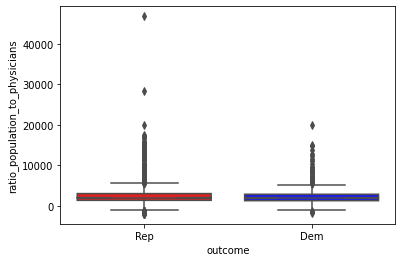

In [26]:
sns.boxplot(x='outcome', y='ratio_population_to_physicians', 
            data=combined_df,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' },
            notch=True
           )
plt.show()

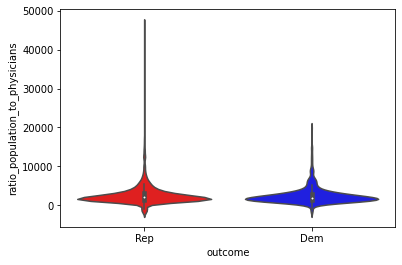

In [27]:
sns.violinplot(x='outcome', y='ratio_population_to_physicians', 
            data=combined_df,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' }
           )
plt.show()

From the box and voilin plot above, the distribution of physicians in republican and democrat counties are pretty much the same. Republicans have some counties that do not have many physicians but these are outliers.

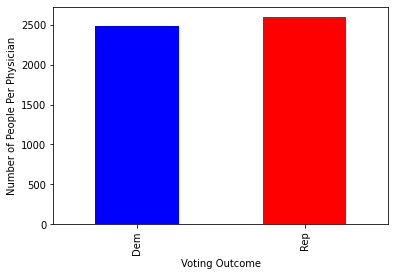

In [28]:
grouped_by_ratio_df = combined_df.groupby('outcome')['ratio_population_to_physicians'].mean()
barlist = grouped_by_ratio_df.plot(kind = 'bar', color = ['b', 'r'])
plt.xlabel("Voting Outcome")
plt.ylabel("Number of People Per Physician")
plt.show()

The average number of physicians for counties split by party is also almost the same. Overall, there is not really anything interesting with the physicial variable relevant to our story. 

# Income Inequality

Vairbale is - the ratio of household income at the 80th percentile to income at the 20th percentile.

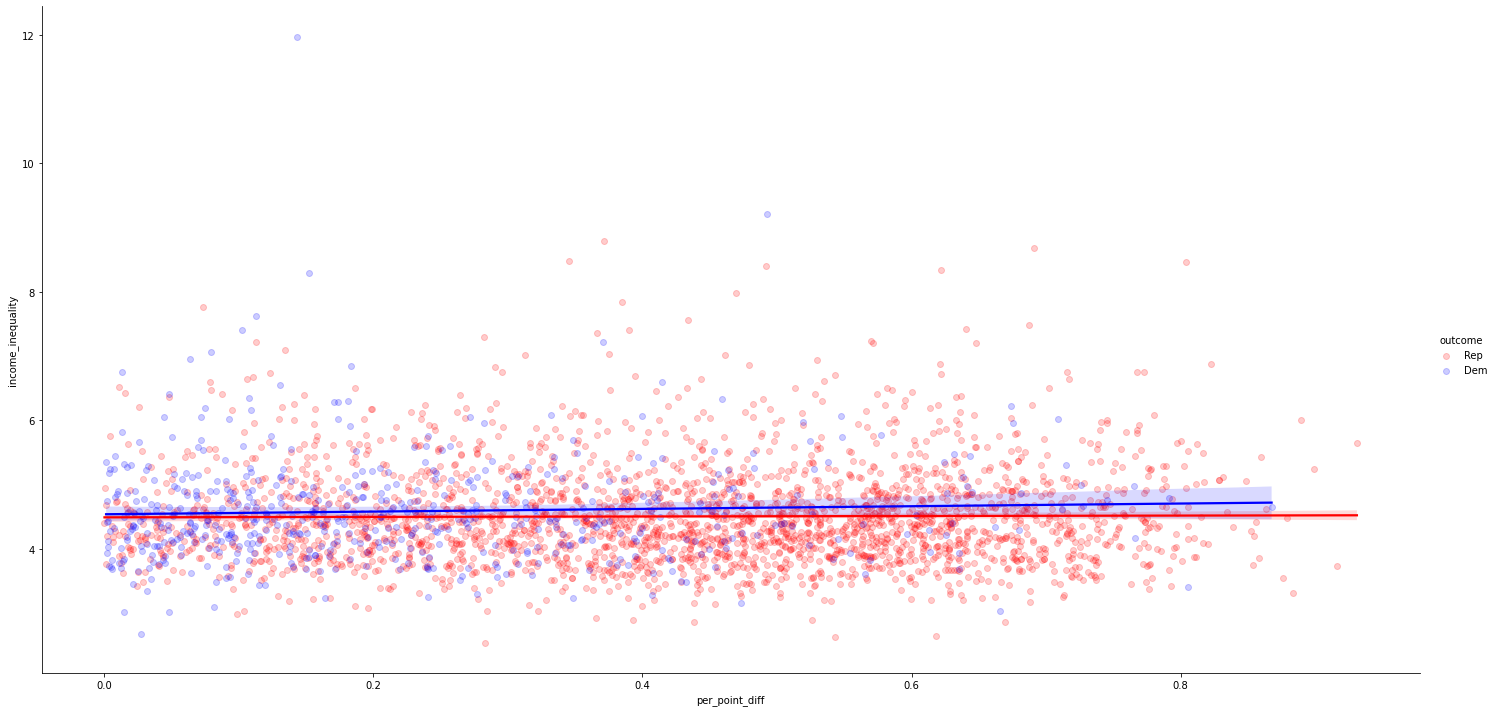

In [29]:
combined_df['per_point_diff_outcome']=combined_df['per_point_diff'] * np.where(combined_df['outcome']=='Dem', -1, 1)

Income_Inequality_Insurance_Plot = sns.lmplot(x = 'per_point_diff',
                                   y = 'income_inequality',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=10, 
                                   aspect=2, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.2})

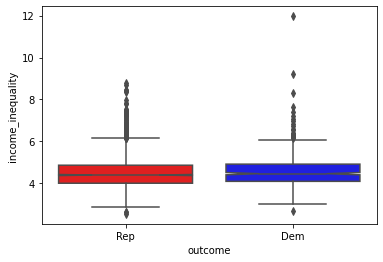

outcome
Dem    4.587669
Rep    4.506869
Name: income_inequality, dtype: float64


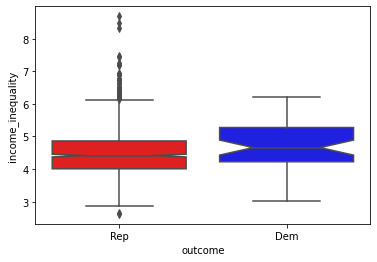

outcome
Dem    4.719457
Rep    4.511092
Name: income_inequality, dtype: float64


In [30]:
sns.boxplot(x='outcome', y='income_inequality', 
            data=combined_df,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' },
            notch=True
           )
plt.show()

print(combined_df.groupby('outcome')['income_inequality'].mean())

sns.boxplot(x='outcome', y='income_inequality', 
            data=partisan_df,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' },
            notch=True
           )
plt.show()

print(partisan_df.groupby('outcome')['income_inequality'].mean())

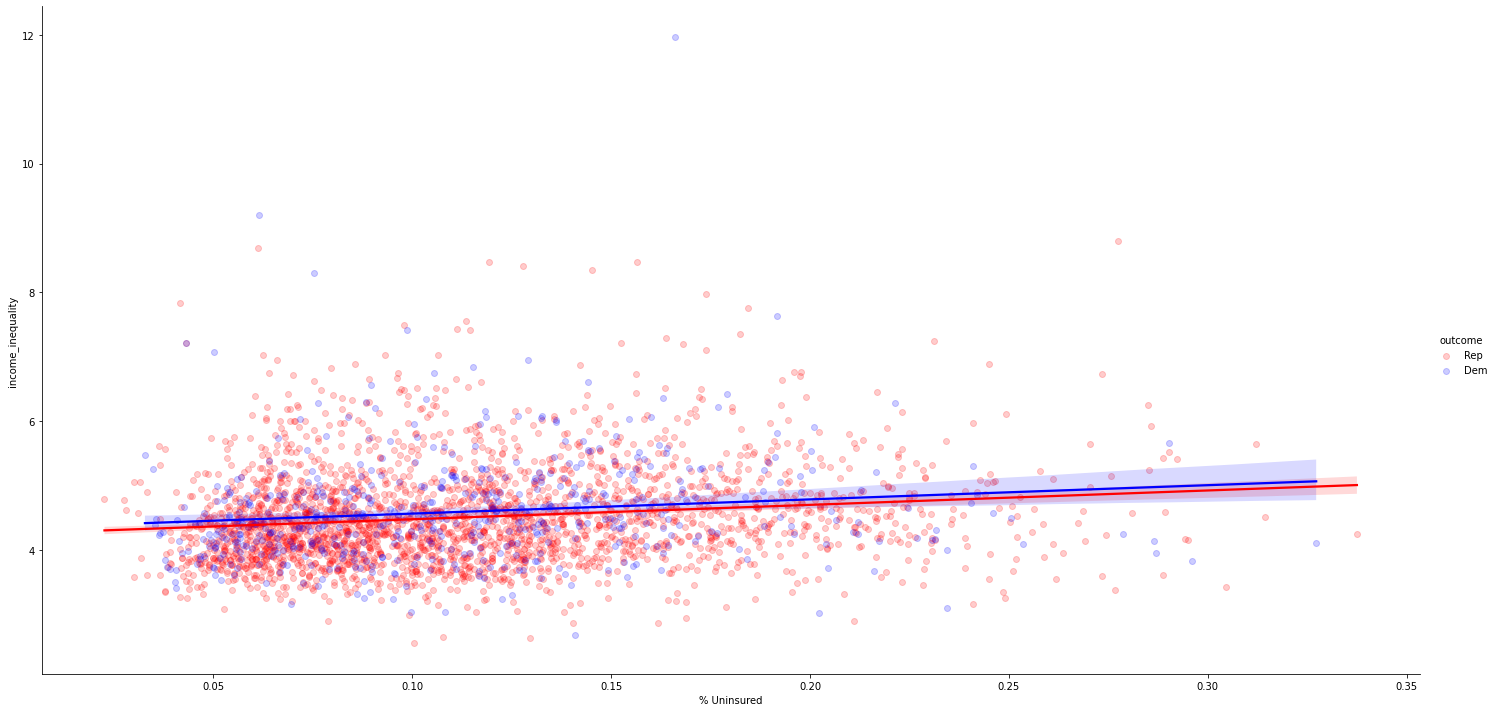

In [31]:
Income_Inequality_Partisan_Plot = sns.lmplot(x = '% Uninsured',
                                   y = 'income_inequality',
                                   data=combined_df, 
                                   hue='outcome', 
                                   height=10, 
                                   aspect=2, 
                                   palette=['red', 'blue'], 
                                   scatter_kws = {'alpha': 0.2})

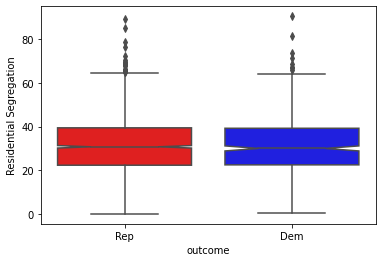

outcome
Dem    30.944425
Rep    31.144057
Name: Residential Segregation, dtype: float64

In [32]:
sns.boxplot(x='outcome', y='Residential Segregation', 
            data=combined_df,
            palette={'Rep': '#ff0000',
                     'Dem': '#0000ff' },
            notch=True
           )
plt.show()

combined_df.groupby('outcome')['Residential Segregation'].mean()

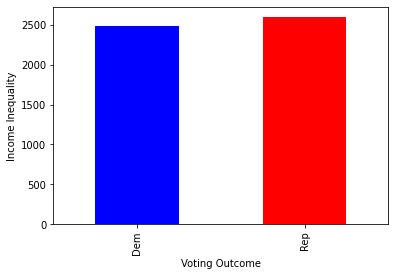

In [33]:
grouped_by_income_inequality_df = combined_df.groupby('outcome')['income_inequality'].mean()
barlist = grouped_by_ratio_df.plot(kind = 'bar', color = ['b', 'r'])
plt.xlabel("Voting Outcome")
plt.ylabel("Income Inequality")
plt.show()

In [34]:
election_data_df=pd.read_csv("../data/2020_election.csv")
election_data_df["outcome"]=election_data_df["per_point_diff"]<0
state_election_data_df=election_data_df[["outcome","state_name", "votes_gop", "votes_dem", "outcome", "total_votes"]]
tot_per_state=state_election_data_df.groupby("state_name")["outcome"].sum()
state_election_data_df.head()

,outcome,state_name,votes_gop,votes_dem,outcome,total_votes
0,False,Alabama,19838,7503,False,27770
1,False,Alabama,83544,24578,False,109679
2,False,Alabama,5622,4816,False,10518
3,False,Alabama,7525,1986,False,9595
4,False,Alabama,24711,2640,False,27588


In [35]:
socioecon_AK_filter=socioecon_df["State"]!="AK"
socioecon_noAK_df=socioecon_df[socioecon_AK_filter]
socioecon_noAK_df.groupby("State")["Population"].sum()

State
AL      9775742.0
AR      6027650.0
AZ     14343292.0
CA     79114090.0
CO     11391128.0
CT      7145330.0
DC      1404910.0
DE      1934342.0
FL     42598650.0
GA     21038950.0
HI      2840982.0
IA      6312290.0
ID      3508416.0
IL     25482160.0
IN     13383756.0
KS      5823010.0
KY      8936804.0
LA      9319956.0
MA     13804298.0
MD     12085436.0
ME      2676808.0
MI     19991830.0
MN     11222358.0
MO     12252904.0
MS      5973060.0
MT      2124610.0
NC     20767240.0
ND      1520154.0
NE      3858536.0
NH      2712916.0
NJ     17817040.0
NM      4190856.0
NV      6068784.0
NY     39084418.0
OH     23378884.0
OK      7886158.0
OR      8381426.0
PA     25614120.0
RI      2114630.0
SC     10168254.0
SD      1764470.0
TN     13540020.0
TX     57403690.0
US    327167434.0
UT      6322210.0
VA     17035370.0
VT      1252598.0
WA     15071182.0
WI     11627136.0
WV      3611664.0
WY      1155474.0
Name: Population, dtype: float64

In [36]:
combined_df['per_point_diff_outcome']=np.where(combined_df['outcome']=='Rep',1,-1)*combined_df['per_point_diff']

<AxesSubplot:xlabel='% Uninsured', ylabel='per_point_diff_outcome'>

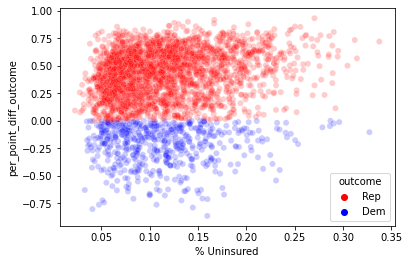

In [37]:
sns.scatterplot(x='% Uninsured', y='per_point_diff_outcome', hue='outcome',
                palette=['r', 'b'], alpha=0.2,
                data=combined_df)

From the plot above, republicans have more counties with higher unisurance rates (above .25%), and republican counties are more likely to be staunchly republican.

In [38]:
reps_filter=(combined_df["per_point_diff_outcome"] > 0)
unins_filter=(combined_df["% Uninsured"] > 0.25)
combined_df["is_rep_unins"]=reps_filter & unins_filter
phys_pop_filter=combined_df["physicians_to_population"]<0.00175
combined_df["phys_pop_filtered"]=phys_pop_filter

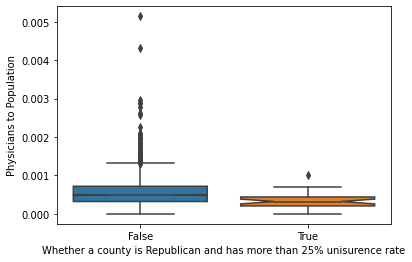

In [39]:
sns.boxplot(x='is_rep_unins', y='physicians_to_population', 
            data=combined_df,
            notch=True
           )
plt.ylabel("Physicians to Population")
plt.xlabel("Whether a county is Republican and has more than 25% unisurence rate")
plt.show()

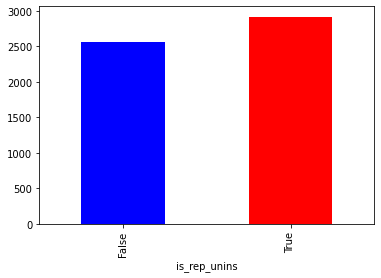

In [40]:
rep_unions = combined_df.groupby('is_rep_unins')['ratio_population_to_physicians'].mean()
barlist = rep_unions.plot(kind = 'bar', color = ['b', 'r'])
plt.show()

Republican counties with high unisurance rates have fewer physicians.

### Recreating the election map.

In [41]:
us_county_gdf = gpd.read_file('../data/us_counties_albers.geojson')
election_data_df=pd.read_csv("../data/2020_election.csv")

election_data_df["outcome"]=election_data_df["per_point_diff"]<0
dem_maj_map={False: "Rep", True: "Dem"}
election_data_df["outcome"]=election_data_df["outcome"].map(dem_maj_map)
election_data_df["per_point_diff"]=np.abs(election_data_df["per_point_diff"])
election_data_df['fips']=election_data_df['county_fips'].astype(str).str.pad(5,fillchar='0')

election_data_gdf = pd.merge(us_county_gdf,
                             election_data_df,
                             left_on=['fips'],
                             right_on=['fips'])

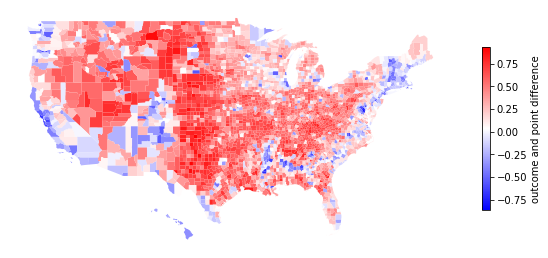

In [42]:
election_data_gdf['per_point_diff_outcome']=election_data_gdf['per_point_diff'] * np.where(election_data_gdf['outcome']=='Dem', -1, 1)

election_data_gdf.plot(column='per_point_diff_outcome',
                       cmap='bwr', legend=True,
                       figsize=(10,10),
                       legend_kwds={'shrink': 0.3,
                                    'label': 'outcome and point difference'}
                      )
plt.axis('off')
plt.show()